Machine Learning의 목표는 크게 Regressor와 Classifier로 나뉜다. 그 중 Classifier의 기초에 대해 다루어보자.  

# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotnine import *

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Datasets

In [475]:
DF.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
***
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
***
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
***
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

# Visualization & Preprocessing

## Check imbalancement of Y

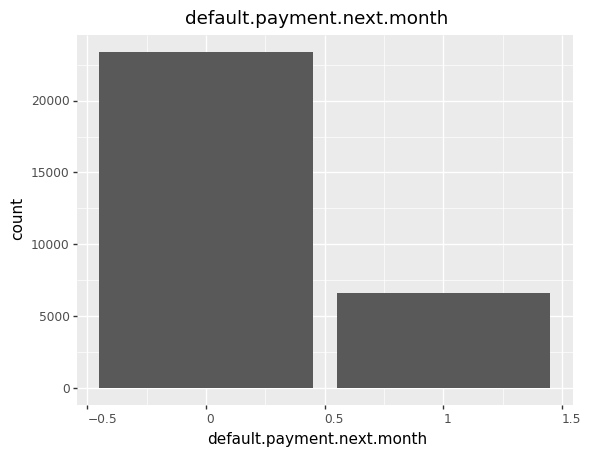

<ggplot: (-9223363280408547696)>

In [4]:
(
    ggplot(DF) 
    + geom_bar(aes(x='default.payment.next.month'))
    + ggtitle("default.payment.next.month")
    + theme(axis_text_x=element_text( hjust=0))
)

It is quite imbalanced. It can affect a result of classification

## Comparing Each X variables

### LIMIT_BAL

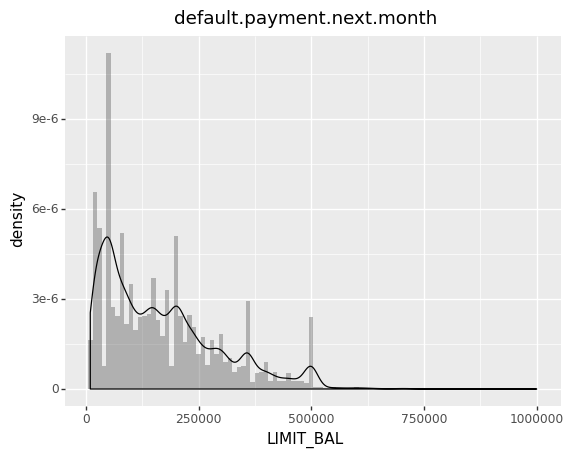

<ggplot: (-9223363280413763482)>

In [5]:
(
    ggplot(DF, aes(x='LIMIT_BAL')) 
    + geom_histogram(aes(y='stat(density)'), bins=100, alpha=0.4)
    + ggtitle("default.payment.next.month")
    + geom_density()
)

In [6]:
DF2 = DF.copy() 
DF2['default'] = DF2['default.payment.next.month'].apply(str)
# to plot multiple graph, value should be in 'str' not 'int'

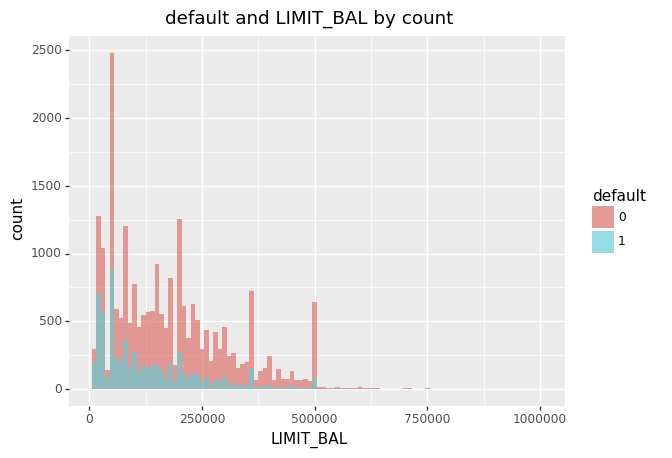

<ggplot: (8756438233832)>

In [7]:
limitbal_cnt = (
    ggplot(DF2, aes(x='LIMIT_BAL',fill='default'))
    + geom_histogram(position="identity",bins=100, alpha=0.6)
    + ggtitle("default and LIMIT_BAL by count")

)
limitbal_cnt

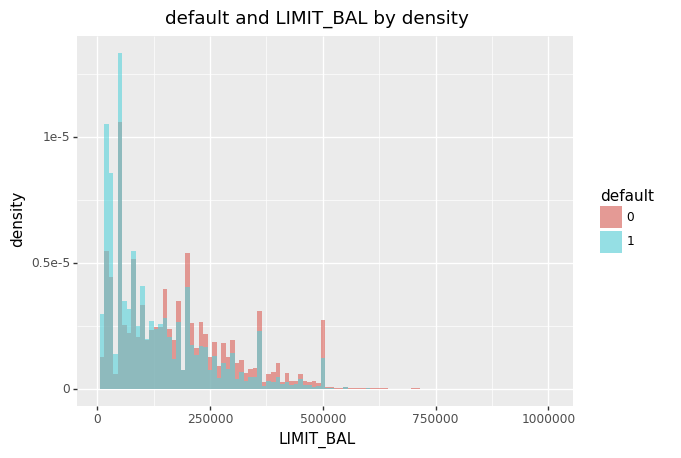

<ggplot: (-9223363280408547780)>

In [8]:
limitbal_dens = (
    ggplot(DF2, aes(x='LIMIT_BAL',fill='default'))
    + geom_histogram(aes(y='stat(density)'), position="identity",bins=100, alpha=0.6)
    + ggtitle("default and LIMIT_BAL by density")
)
limitbal_dens

It looks like there's no difference between LIMIT_BAL by default based on count, however, default users tend to have less LIMIT_BALL based on density.  
It would be great if subplotting supported by plotnine, which is not.(https://github.com/has2k1/plotnine/issues/46)

### Sex

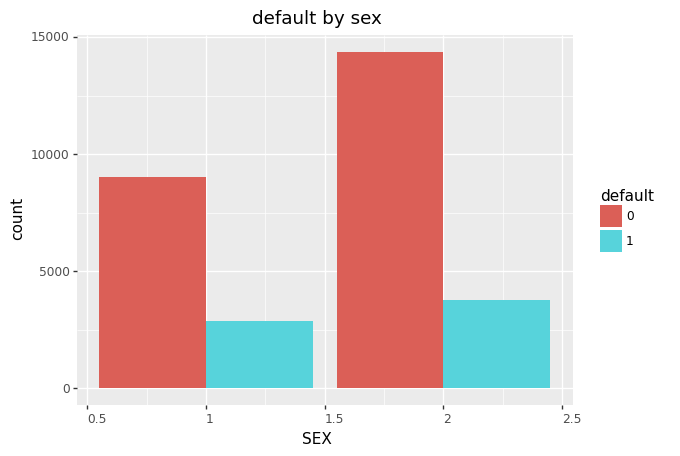

<ggplot: (8756438234474)>

In [9]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='SEX', fill='default'),position='dodge')
    + ggtitle("default by sex")
    + theme(axis_text_x=element_text( hjust=0))
)

Males are likely to be in default

### Education

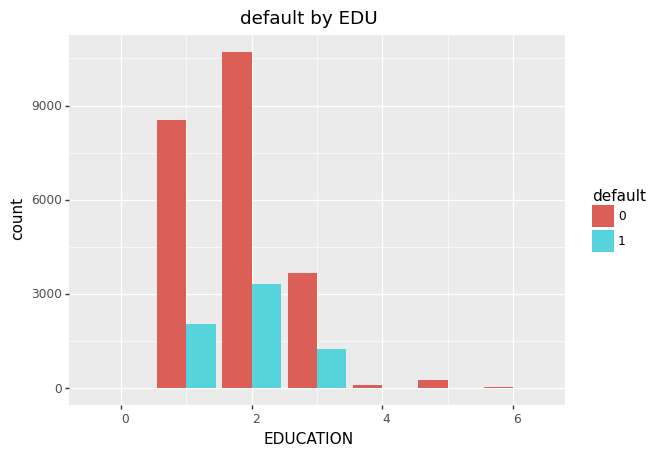

<ggplot: (-9223363280416624759)>

In [10]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='EDUCATION', fill='default'),position='dodge')
    + ggtitle("default by EDU")
    + theme(axis_text_x=element_text( hjust=0))
)

Edu supposed to have 1~4 as value, then find what 0, 5, 6 are.  


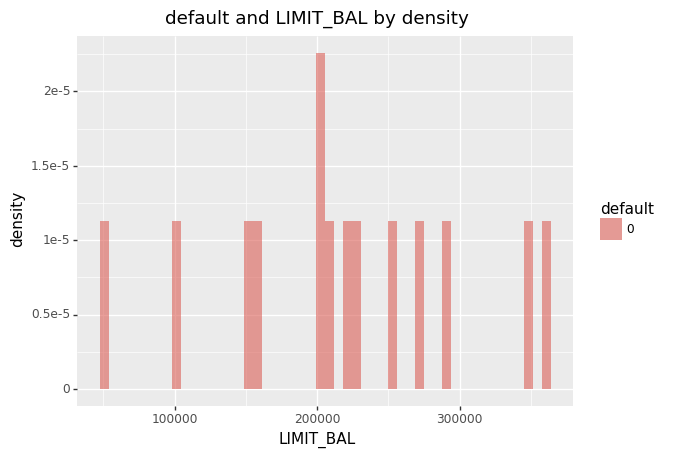

<ggplot: (-9223363280416413927)>

In [11]:
limitbal_dens = (
    ggplot(DF2[DF2.EDUCATION==0], aes(x='LIMIT_BAL',fill='default'))
    + geom_histogram(aes(y='stat(density)'), position="identity",bins=50, alpha=0.6)
    + ggtitle("default and LIMIT_BAL by density")
)
limitbal_dens

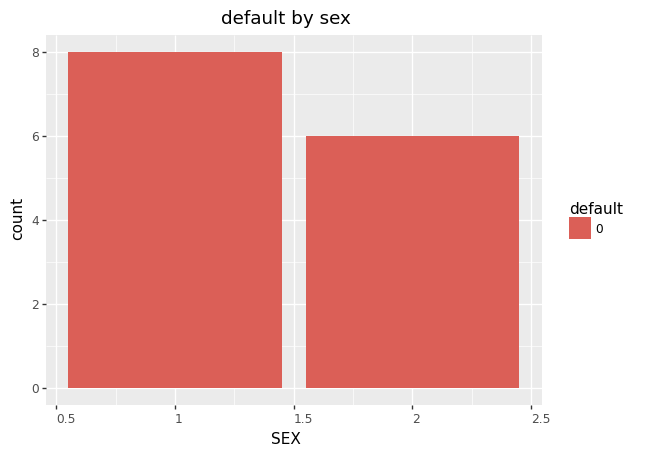

<ggplot: (-9223363280413747852)>

In [12]:
(
    ggplot(DF2[DF2.EDUCATION==0]) 
    + geom_bar(aes(x='SEX', fill='default'),position='dodge')
    + ggtitle("default by sex")
    + theme(axis_text_x=element_text( hjust=0))
)

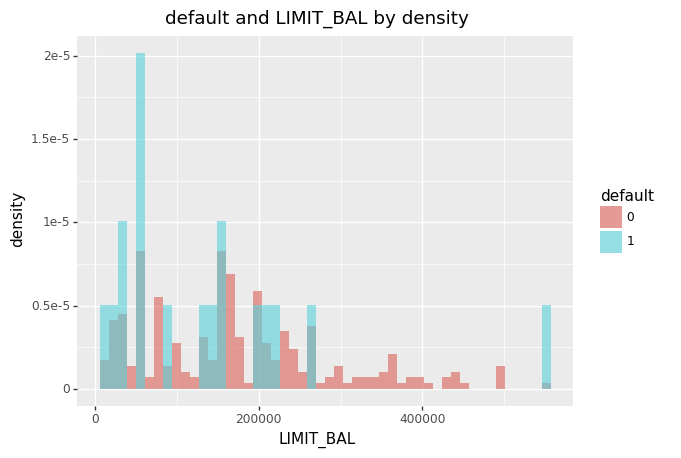

<ggplot: (-9223363280416419703)>

In [13]:
limitbal_dens = (
    ggplot(DF2[DF2.EDUCATION==5], aes(x='LIMIT_BAL',fill='default'))
    + geom_histogram(aes(y='stat(density)'), position="identity",bins=50, alpha=0.6)
    + ggtitle("default and LIMIT_BAL by density")
)
limitbal_dens

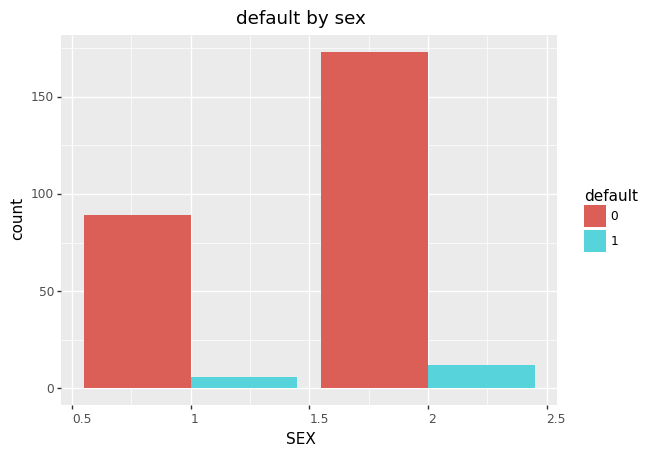

<ggplot: (-9223363280416614961)>

In [14]:
(
    ggplot(DF2[DF2.EDUCATION==5]) 
    + geom_bar(aes(x='SEX', fill='default'),position='dodge')
    + ggtitle("default by sex")
    + theme(axis_text_x=element_text( hjust=0))
)

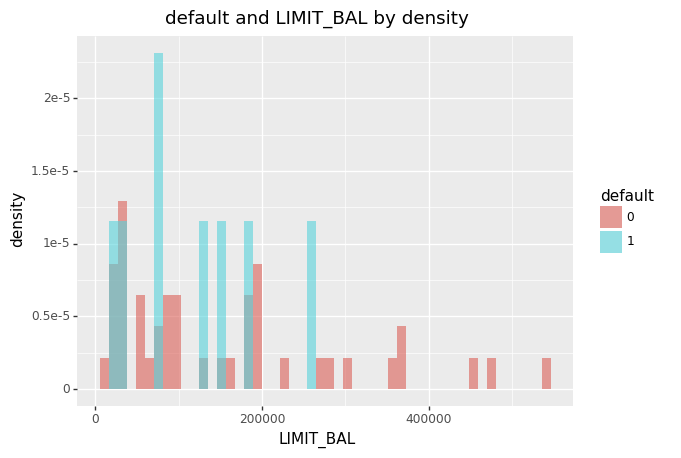

<ggplot: (8756438081021)>

In [15]:
limitbal_dens = (
    ggplot(DF2[DF2.EDUCATION==6], aes(x='LIMIT_BAL',fill='default'))
    + geom_histogram(aes(y='stat(density)'), position="identity",bins=50, alpha=0.6)
    + ggtitle("default and LIMIT_BAL by density")
)
limitbal_dens

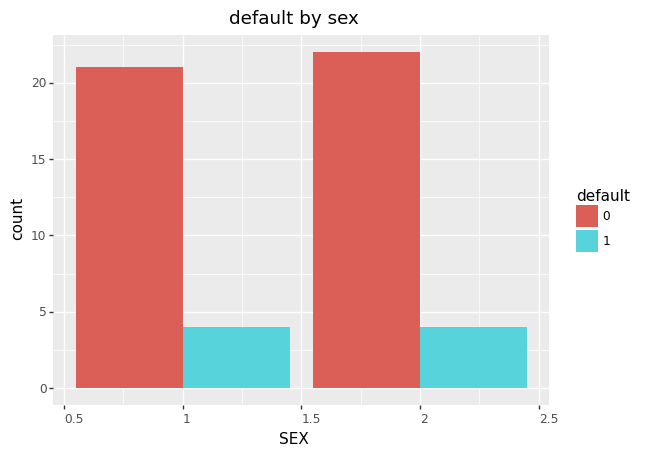

<ggplot: (-9223363280416726335)>

In [16]:
(
    ggplot(DF2[DF2.EDUCATION==6]) 
    + geom_bar(aes(x='SEX', fill='default'),position='dodge')
    + ggtitle("default by sex")
    + theme(axis_text_x=element_text( hjust=0))
)

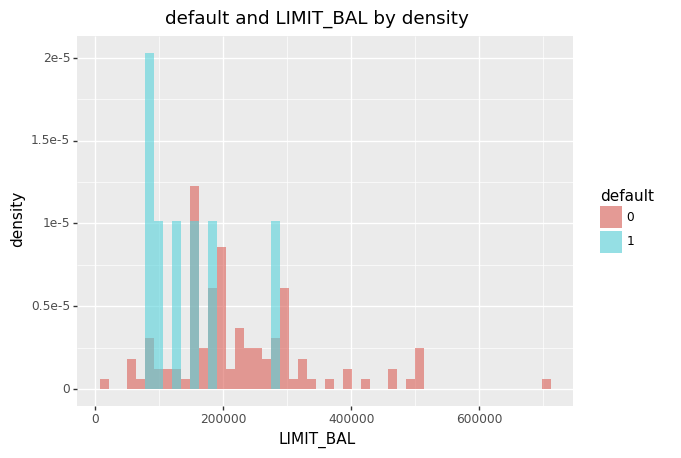

<ggplot: (8756438006280)>

In [17]:
limitbal_dens = (
    ggplot(DF2[DF2.EDUCATION==4], aes(x='LIMIT_BAL',fill='default'))
    + geom_histogram(aes(y='stat(density)'), position="identity",bins=50, alpha=0.6)
    + ggtitle("default and LIMIT_BAL by density")
)
limitbal_dens

In [18]:
SexEdu = pd.DataFrame(DF2.groupby('SEX')['EDUCATION'].value_counts().reset_index(name='counts'))
SexEdu['SEX'] = SexEdu.SEX.apply(str)

In [19]:
SexEdu

,SEX,EDUCATION,counts
0,1,2,5374
1,1,1,4354
2,1,3,1990
3,1,5,95
4,1,4,42
5,1,6,25
6,1,0,8
7,2,2,8656
8,2,1,6231
9,2,3,2927


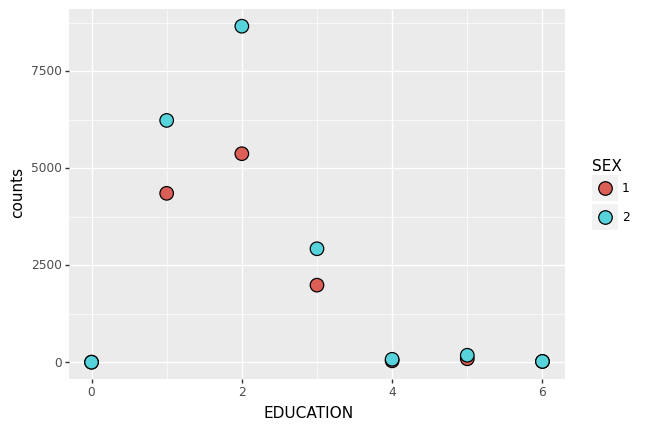

<ggplot: (-9223363280416785299)>

In [20]:
(
ggplot(SexEdu)
    +geom_point(aes(x = 'EDUCATION', y = 'counts', fill='SEX'), size=5)
)

 It tends to show high default in low LIMIT_BAL, but gender distribution is quite different. Since it seems hard to replace by mode or mean, i just replase 0, 5, 6 to 'others' which is 4. Implementing EM algorithm would helpful.

In [21]:
DF2['EDUCATION'].replace(5,4,inplace=True)
DF2['EDUCATION'].replace(6,4,inplace=True)
DF2['EDUCATION'].replace(0,4,inplace=True)

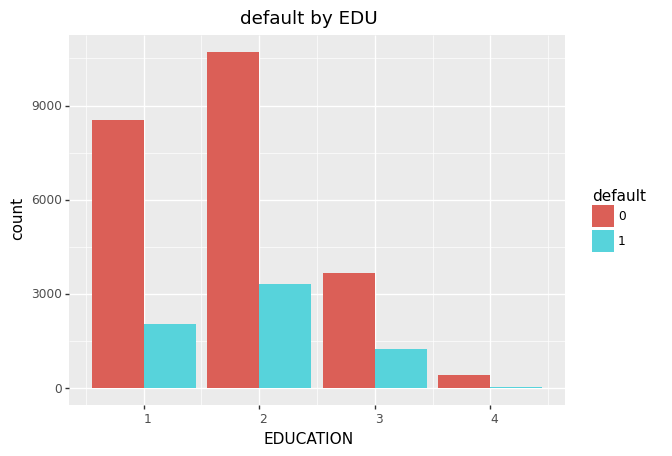

<ggplot: (-9223363280416816787)>

In [22]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='EDUCATION', fill='default'),position='dodge')
    + ggtitle("default by EDU")
    + theme(axis_text_x=element_text( hjust=0))
)

### Marriage

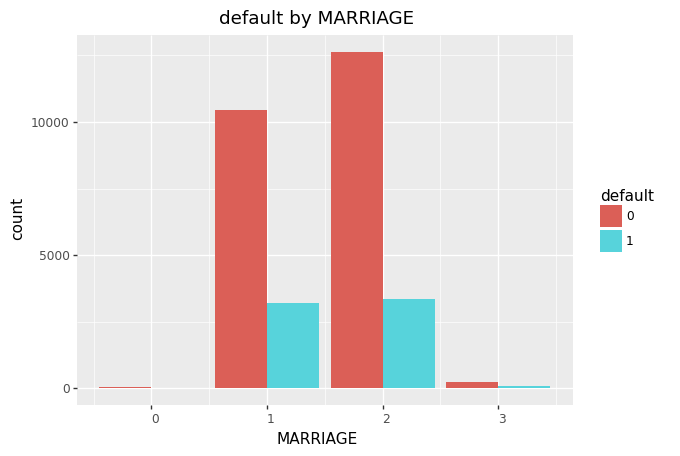

<ggplot: (-9223363280416785229)>

In [23]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='MARRIAGE', fill='default'),position='dodge')
    + ggtitle("default by MARRIAGE")
    + theme(axis_text_x=element_text( hjust=0))
)

I also replace MARRAIGE 0 to 'others', 3

In [24]:
DF2['MARRIAGE'].replace(0,3,inplace=True)

### Age

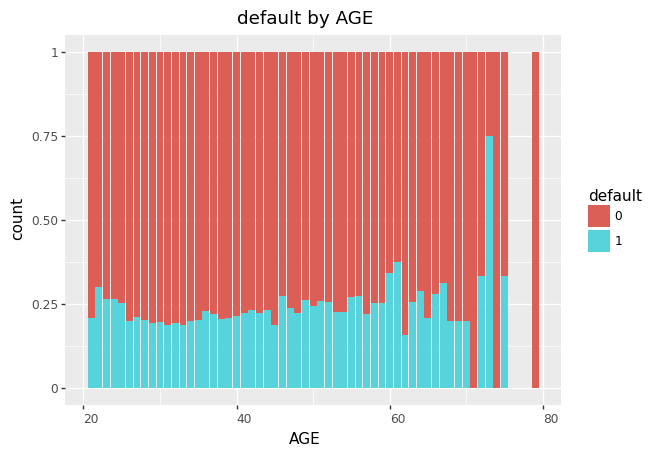

<ggplot: (-9223363280416873640)>

In [25]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='AGE', fill='default'),position='fill')
    + ggtitle("default by AGE")
    + theme(axis_text_x=element_text( hjust=0))
)

default seems irrelevent with age

### PAY

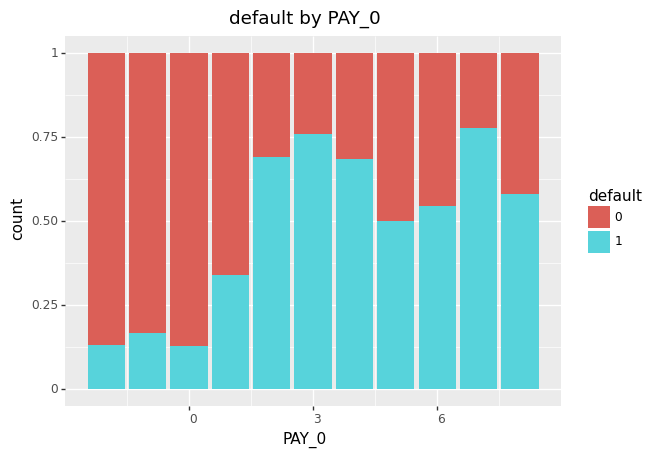

<ggplot: (8756438021682)>

In [26]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='PAY_0', fill='default'),position='fill')
    + ggtitle("default by PAY_0")
    + theme(axis_text_x=element_text( hjust=0))
)

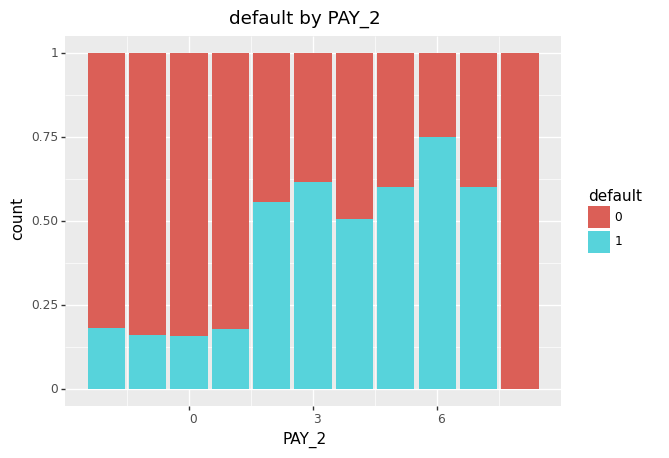

<ggplot: (8756437861780)>

In [27]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='PAY_2', fill='default'),position='fill')
    + ggtitle("default by PAY_2")
    + theme(axis_text_x=element_text( hjust=0))
)

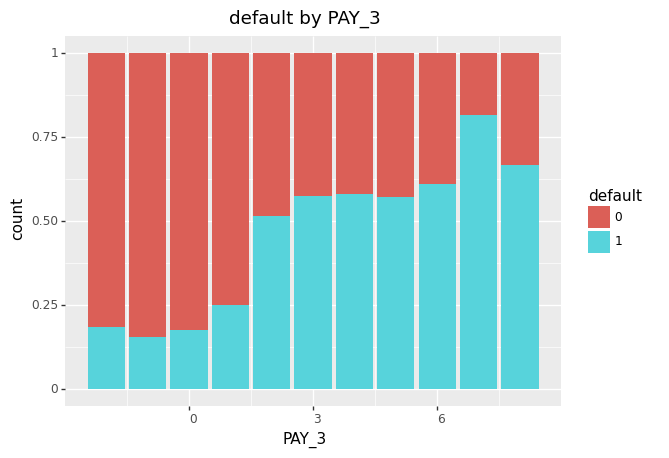

<ggplot: (8756437730501)>

In [28]:
(
    ggplot(DF2) 
    + geom_bar(aes(x='PAY_3', fill='default'),position='fill')
    + ggtitle("default by PAY_3")
    + theme(axis_text_x=element_text( hjust=0))
)

In [29]:
CORRDF = DF2.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
CORRDF = CORRDF.corr().stack().reset_index()
CORRDF.columns=['Var1', 'Var2', 'Value']
CORRDF['Value'] = CORRDF.Value.apply(lambda x: round(x,2))

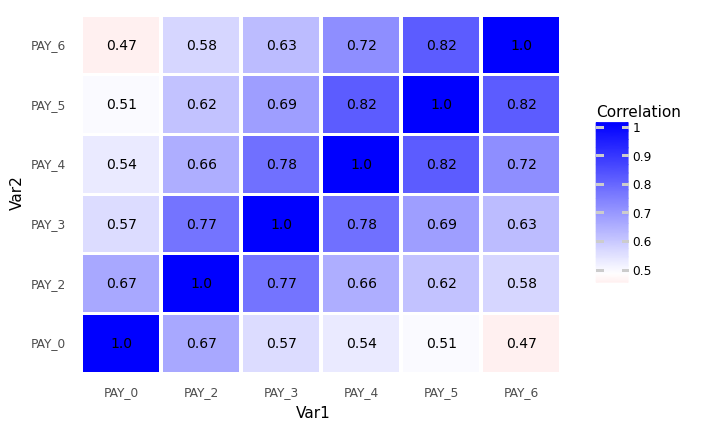

<ggplot: (-9223363280416929827)>

In [30]:
(ggplot(CORRDF, aes('Var1', 'Var2', fill='Value'))
 + geom_tile(aes(width=.95, height=.95))
 + scale_fill_gradient2(high='blue', low='red', mid='white', midpoint = 0.5, name="Correlation")
 + geom_text(aes(label='Value'), size=10)          
 + theme(                                          
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
)

 PAY are all highly correlated. For explanation, removing correlation would help, however for prediction power, more columns , the better.
  
 Also, correlation is high among previous month's status. It implies that user who default previous month will hightly likely to be in default this month.  
 
 Since PAY columns explain well about previous status and past default records, further modifying won't be necessary

### BILL_AMT and PAY_AMT

simple comparing of Bill and Pay AMT seems to be meaningless since it is different by LIMIT_BAL, which can be interpreted as wealth.  
To reflect this point, I subset pay_amt from bill_amt, and then divide it by limit_bal

In [31]:
DF2 = DF2.assign(PAID_AMT = (DF2['BILL_AMT1'] - DF2['PAY_AMT1']
          + DF2['BILL_AMT2'] - DF2['PAY_AMT2']
          + DF2['BILL_AMT3'] - DF2['PAY_AMT3']
          + DF2['BILL_AMT4'] - DF2['PAY_AMT4']
          + DF2['BILL_AMT5'] - DF2['PAY_AMT5']
          + DF2['BILL_AMT6'] - DF2['PAY_AMT6']) / DF2['LIMIT_BAL'])

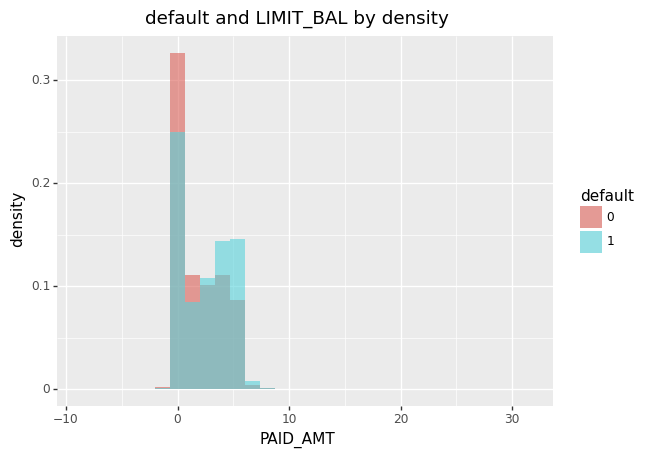

<ggplot: (8756437859455)>

In [32]:
(
    ggplot(DF2, aes(x='PAID_AMT',fill='default'))
    + geom_histogram(aes(y='stat(density)'), position="identity",bins=30, alpha=0.6)
    + ggtitle("default and LIMIT_BAL by density")
)

not highly significant, but there is relaton between new variable and default rate

# Modifying Data

## One-hot encoding

for Categorical variables, you need to change to dummy variables, which is called one-hot encoding. 

SEX is already in two variables, only MARRIAGE and EDUCATION needs to be transformed

In [33]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()

In [34]:
# encoded = pd.DataFrame(encoder.fit_transform(DF2[['EDUCATION','MARRIAGE']]).toarray())
# DF2.drop(['EDUCATION','MARRIAGE'],axis=1,inplace=True)

In [35]:
DF2 = pd.concat([DF2, pd.get_dummies(DF2.EDUCATION,  prefix='EDU'), pd.get_dummies(DF2.MARRIAGE,  prefix='MAR')], axis=1)

In [36]:
DF2.drop(['EDUCATION','MARRIAGE'],axis=1,inplace=True)

## Scaling

Each Variable has different scale, but computer interpret as same value. Scaling might help result.  
sklearn provide Scaler

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
DF2.drop(['ID', 'default'],axis=1, inplace=True)

In [39]:
DF2[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAID_AMT']]

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAID_AMT
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.350750
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.100642
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1.007056
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,4.458920
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.005800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,3.103632
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.044613
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.306533
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.492875


In [40]:
DF2[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAID_AMT']] = scaler.fit_transform(DF2[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAID_AMT']])

## Imbalanced Data

There are several ways to prevent imbalanced Data.   

1) Use proper metric  
 Accuracy is not proper in imbalanced case. Use f1-score or other.  
 
2) Sampling  
 through down-sampling ,over-sampling, (or similiary SMOTE) adjust imbalanced data to balanced data set.

3) adjust threshold  
 you can find proper Threshold

In [41]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train_over,y_train_over = smote.fit_sample(X_train,y_train)

## Split train and test

In [42]:
DF2 = DF2[['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'PAID_AMT', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'MAR_1', 'MAR_2',
       'MAR_3','default.payment.next.month']]

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(DF2.iloc[:,0:29], DF2.iloc[:,-1], test_size=0.25, random_state=0)

In [44]:
X_train

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,PAID_AMT,EDU_1,EDU_2,EDU_3,EDU_4,MAR_1,MAR_2,MAR_3
12880,-0.288907,2,-0.920561,0.014861,0.111736,0.138865,0.188746,0.234917,-0.616452,-0.330759,...,-0.263082,-0.293382,-0.484355,1,0,0,0,0,1,0
14868,-0.288907,2,1.900084,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.442853,...,-0.153710,-0.143808,-0.510382,0,0,1,0,1,0,0
14280,-0.211833,1,0.272789,1.794564,1.782348,1.809921,1.899436,1.999879,1.992316,0.807374,...,-0.163593,0.004753,1.579133,0,0,1,0,1,0,0
5318,0.790129,2,-0.269643,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,0.253137,-0.539615,...,-0.052323,-0.180878,-0.950250,0,1,0,0,1,0,0
15421,0.404759,2,1.900084,1.794564,0.111736,0.138865,0.188746,0.234917,0.253137,2.297366,...,0.226116,0.080131,1.811032,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-1.059646,1,0.272789,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.331343,...,-0.117776,0.100494,0.552075,0,1,0,0,0,1,0
19648,0.327685,2,-0.269643,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,2.018448,...,0.039312,0.009253,1.415000,1,0,0,0,1,0,0
9845,-0.288907,2,0.815221,0.014861,0.111736,0.138865,0.188746,0.234917,1.992316,0.309592,...,-0.314136,-0.012122,0.172347,0,0,1,0,1,0,0
10799,-0.905498,2,-0.703588,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.076898,...,-0.248683,-0.265256,0.562930,0,0,1,0,1,0,0


## CrossValidate

In [48]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)
cv_accuracy =[] 

# Modeling

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print('accuracy:{}, preicison:{}, recall:{},f1 score:{}'.format(accuracy,precision,recall,f1))

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(penalty='l1', solver='liblinear')
scaler = StandardScaler()

In [51]:
n_iter = 0
for train_index,test_index in kfold.split(X_train):
    x_train, x_test = X_train.iloc[train_index, 0:29],X_train.iloc[test_index, 0:29]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    n_iter+=1
    
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('Train Size:',train_size,'Test Size',test_size)
    get_clf_eval(y_test,pred)

Train Size: 18000 Test Size 4500
confusion matrix
[[3459   81]
 [ 742  218]]
accuracy:0.8171111111111111, preicison:0.7290969899665551, recall:0.22708333333333333,f1 score:0.34630659253375695
Train Size: 18000 Test Size 4500
confusion matrix
[[3420   88]
 [ 752  240]]
accuracy:0.8133333333333334, preicison:0.7317073170731707, recall:0.24193548387096775,f1 score:0.36363636363636365
Train Size: 18000 Test Size 4500
confusion matrix
[[3380  112]
 [ 771  237]]
accuracy:0.8037777777777778, preicison:0.6790830945558739, recall:0.23511904761904762,f1 score:0.3492999263080324
Train Size: 18000 Test Size 4500
confusion matrix
[[3376   99]
 [ 811  214]]
accuracy:0.7977777777777778, preicison:0.6837060702875399, recall:0.20878048780487804,f1 score:0.31988041853512705
Train Size: 18000 Test Size 4500
confusion matrix
[[3375  106]
 [ 774  245]]
accuracy:0.8044444444444444, preicison:0.698005698005698, recall:0.24043179587831207,f1 score:0.3576642335766423


In [52]:
y_pred = lr.predict(X_test)

In [53]:
f1_score(Y_test, y_pred)

0.3441162681669011

### Interpretation of logistic regression

In [54]:
CoeDF = pd.DataFrame({'Var' : x_test.columns})
CoeDF['coef'] = lr.coef_[0]

In [55]:
CoeDF

,Var,coef
0,LIMIT_BAL,-0.109035
1,SEX,-0.155700
2,AGE,0.043017
3,PAY_0,0.603080
4,PAY_2,0.128700
5,PAY_3,0.093726
6,PAY_4,0.000925
7,PAY_5,0.049793
8,PAY_6,0.054467
9,BILL_AMT1,-0.595128


Coefficient를 보면, Bill_AMT 와 Pay_AMT가 가장 중요한 변수임을 알 수 있다!

### Threshold

In [56]:
from sklearn import metrics
trp, tpr, thresholds = metrics.roc_curve(Y_test, lr.predict_proba(X_test)[:,1])

In [388]:
f1_list=[]
for thres in thresholds:
    y_pred = np.where(lr.predict_proba(X_test)[:,1]>thres,1,0)
    f1_list.append(f1_score(Y_test, y_pred))

In [390]:
max(f1_list)

0.5059503570214213

In [391]:
np.where(np.array(f1_list)==max(f1_list))

(array([590]),)

In [396]:
thresholds[590]

0.30052303227774907

최적의 thresholds는 0.3이다!  

## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [57]:
rf= RandomForestClassifier()

### Hyper-parameter Tuning 

#### This Time, Grid-search

In [404]:
params = {
    'n_estimators':[60,80,100,120,150,180],
    'max_depth':[10,20,30,40],
    'min_samples_split':[5,10,15,20]
}

grid_cv = GridSearchCV(rf,param_grid=params,n_jobs=-1,scoring='f1')
grid_cv.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [60, 80, 100, 120, 150, 180]},
             scoring='f1')

In [405]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 150},
 0.47577073176524787)

In [58]:
rf_best = RandomForestClassifier(n_estimators=150,max_depth=20,min_samples_split=20)
rf_best.fit(X_train,Y_train)
pred = rf_best.predict(X_test)

### Threshold

In [59]:
trp, tpr, thresholds = metrics.roc_curve(Y_test, rf_best.predict_proba(X_test)[:,1])

In [60]:
f1_list=[]
K = rf_best.predict_proba(X_test)[:,1]
for thres in thresholds:
    y_pred = np.where(K>thres,1,0)
    f1_list.append(f1_score(Y_test, y_pred))

In [61]:
max(f1_list)

0.5367521367521367

In [62]:
np.where(np.array(f1_list)==max(f1_list))

(array([804]),)

In [63]:
thresholds[804]

0.2779825477881606

Max f1_score는 0.54!  
이때 thresholds는 0.27임을 확인할 수 있다

### Interpretation of blackbox

회귀 모델과는 다르게, black box model을 해석하는데는 어려움이 있다. feature-importance plot 을 그릴 수 있으나, 랜덤에 기반한 모델일 경우 설명력에 치명적인 단점을 지니고 있다. 이때, LIME package를 통해 부분적으로 설명할 수 있다.

In [64]:
import lime
import lime.lime_tabular

In [66]:
predict_fn_rf = lambda x: rf_best.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['non-default','default'],kernel_width=5)

In [67]:
choosen_instance = X_test.loc[[8225]].values[0]

In [68]:
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=5)

In [69]:
exp.show_in_notebook(show_all=False)

LIME은 Case 별로 살펴볼 수 있게 해주는 패키지이다. 위 케이스는 default 확률이 0.52로 예측되었으며, PAY_0, PAID_AMT, PAY_2, PAY_3, LIMIT_BAL의 변수가 중요하게 여겨지고 있고, 위 변수들로 인해 Default 확률이 얼마나 증가했는지를 보여준다.